In [1]:
# computer vision libraries

import torch as t
from torch import nn

# import torchvision
import torchvision as tv
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pylab as plt

# check the version
print(f"Pytorch version: {t.__version__}\ntorchvision version: {tv.__version__}")

Pytorch version: 2.0.0+cu117
torchvision version: 0.15.1+cu117


## 1. Getting a dataset
we will use very basic dataset what used in computer vision problem. 
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, made by Zalando Research, is similar setup.

In [2]:
# Get the training data
train_data = datasets.FashionMNIST(
    root='/media/mahfuz/Media/datasets/fashionMNIST', # where to download data to?
    train=True,
    download=True,
    transform=ToTensor(), # images come as PIL format, we want to turn torch tensor
    target_transform=None
)
print(f'Train dataset download is completed....')

# get the test data
test_data = datasets.FashionMNIST(
    root='/media/mahfuz/Media/datasets/fashionMNIST',
    train=False,
    download=True,
    transform=ToTensor()
)
print(f'Test dataset download is completed....')

Train dataset download is completed....
Test dataset download is completed....


Let's check out the first sample of the training data

In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 input and output shapes of the computer vision model

We've got big tensor of values leading to the single value for the target (the label), let's see the image shape

In [4]:
# what's the shape of the image? 
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is ```[1, 28, 28]``` or more specifically:
```python
[color_channels = 1, height=28, width=28]
```
Having ```color_channels=1``` means the images is grayscale.

Let's check out more shapes of our data.

In [5]:
# how many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

We have got 60,000 training samples and 10,000 testing samples

what classes are there?

We can find these via the ```.classes``` attribute.

In [6]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

There have 10 different classes means, the problem is multi-class classification. Let's get visual.

### 1.2 Visualizing Data

Image shape: torch.Size([1, 28, 28])


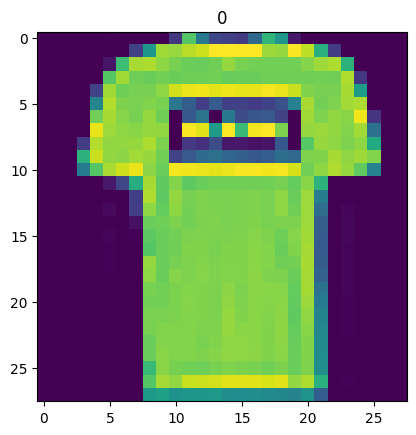

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

We will turn the image into grayscale using the ```cmap``` parameter of ```plt.imshow()```

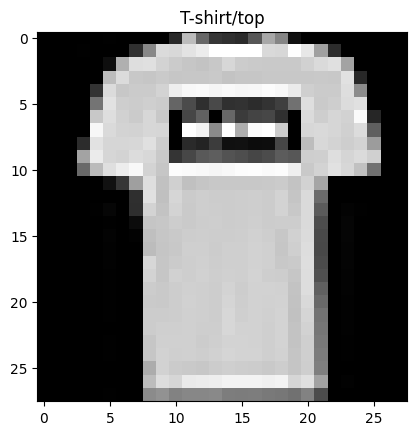

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

Let's plot more image

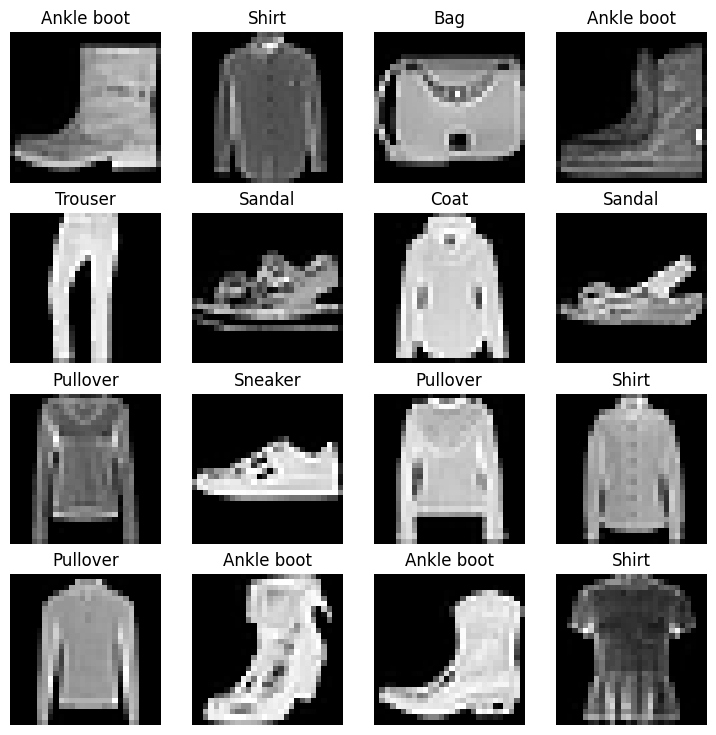

In [9]:
# plot more image
t.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = t.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [10]:
# debug
random_i = t.randint(0, len(train_data), size=[1]).item()
print(f'random number is: {random_i}')


t.randint(0, 5, size=[1]).item()

random number is: 29315


0

## 2. Prepare DataLoader
Library: ```torch.utils.data.DataLoader``` or ```DataLoader```

In [11]:
from torch.utils.data import DataLoader

# set hyperparameter = batch size
bs = 32 # 32 is good batch size to train or test a dataset

# turn datasets into iterables(batches)
train_dataloader = DataLoader(
    train_data, # the dataset, which turn into the iterable
    batch_size=bs, # sample size
    shuffle=True, # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=bs,
    shuffle=False
)

In [12]:
# Let's check what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train dataloader: {len(train_dataloader)} batches of {bs}")
print(f"Lenght of test dataloader: {len(test_dataloader)} batches of {bs}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fe50b5157d0>, <torch.utils.data.dataloader.DataLoader object at 0x7fe5088eb490>)
Lenght of train dataloader: 1875 batches of 32
Lenght of test dataloader: 313 batches of 32


In [13]:
# let's check the inside of the train/test dataloader
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
test_feature_batch, test_labels_batch = next(iter(test_dataloader))

print(f"train batch: {train_feature_batch.shape}, {train_labels_batch.shape}")
print(f"test batch: {test_feature_batch.shape}, {test_labels_batch.shape}")

train batch: torch.Size([32, 1, 28, 28]), torch.Size([32])
test batch: torch.Size([32, 1, 28, 28]), torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


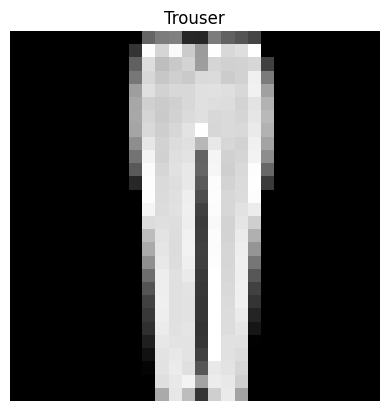

In [14]:
# check the data, that remain unchanged

t.manual_seed(42)
random_idx_feature_batch = t.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx_feature_batch], train_labels_batch[random_idx_feature_batch]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis("Off")

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model: Build a base model
- ```nn.Module``` module
- ```nn.Linear()``` layers
- [```nn.Flatten()``` layer](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)

In [15]:
# create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model 

# get a single sample
x = train_feature_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [16]:
# check the flatten or non flatten output
#print(x)
print(output)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0000, 0.7294, 0.8471, 0.8431, 0.8627, 0.9686, 0.0000,
         0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3922, 0.9020, 0.9176, 0.9490, 0.9333, 0.9255,
         0.6627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.3294, 0.7216, 0.9647, 0.9216, 0.8510, 0.8667, 0.8667, 0.8588,
         0.8431, 0.9059, 1.0000, 0.7294, 0.3686, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0588, 0.7725, 0.9137, 0.8824, 0.8471, 0.8275, 0.8510, 0.9020, 0.8745,
         0.8706, 0.8745, 0.8353, 0.8392, 0.8863, 0.9059, 0.8157, 0.2039, 0.0000,
         0.0157, 0.0000, 0.0

Let's create a model using ```nn.Flatten()``` as the first layer

In [17]:
from torch import nn
class FashionMNISTModelv0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their input in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape) 
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running ```model_0``` on CPU vs. a similar model on GPU soon).

In [18]:
t.manual_seed(42)

# make a model with parameters
model_cpu = FashionMNISTModelv0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_cpu.to('cpu')

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Loss, optimizer and evaluation maetics

In [19]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo

if Path('helper_function.py').is_file():
    print("'helper_function.py' already exists, skipping download")
else:
    print("Downloading helper_function.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_function.py','wb') as f:
        f.write(request.content)
    print('helper_function.py is downloaded.')

'helper_function.py' already exists, skipping download


In [20]:
# import accuracy metric
from helper_function import accuracy_fn

# setup loss funcation and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(params=model_cpu.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments
let's try to trian the model with tracking the time using ```timeit.default_timer()``` python ```timeit``` module.

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: t.device = None):
    """prints difference between start and end time

    args:
        start (float): Start time of computation (preferred in timeit format)
        end (float): End time of computation.
        devie ([type], optional): Device that compute is running on. Defaults to None
    
    Return:
        float: time between start and end in seconds (higher is longer)
    """
    total_time = end - start
    print(f"train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Let's step through it:

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss _per batch_.
3. Loop through testing batches, perform testing steps, calculate the test loss _per batch_.
4. Print out what's happening.
5. Time it all (for fun).

In [23]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
t.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epoch 
epochs = 3

# create training and tesing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n------------")

    # training
    train_loss = 0

    # add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()

        # 1. forward pass
        y_pred = model_cpu(X)

        # 2. Calculate loss(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #print(f"{train_loss}")


        # 3. optimizer zero grad
        optimizer.zero_grad()


        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # print out how many sample have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # divide total train loss by length of train dataloader 
    train_loss /= len(train_dataloader)
    #print(f"train_loss")


    # testing
    # setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_cpu.eval()
    with t.inference_mode():
        for X, y in test_dataloader:
            # 1. forward pass
            test_pred = model_cpu(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per batch
            #print(f'{test_loss}')

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            #print(f'{test_acc}')
        # calculaitons on test matrics need to happen inside torch.inference_mode()
        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        #print(f'{test_loss}')

        # divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    
    # print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu, 
    end=train_time_end_on_cpu,
    device=str(next(model_cpu.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:05<00:11,  5.59s/it]


Train loss: 0.44395 | Test loss: 0.46506, Test acc: 83.65%

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:11<00:05,  5.69s/it]


Train loss: 0.43662 | Test loss: 0.46453, Test acc: 83.89%

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:17<00:00,  5.76s/it]


Train loss: 0.43045 | Test loss: 0.46594, Test acc: 83.93%

train time on cpu: 17.273 seconds


## 4. Make predictions and get Model 0 results

In [24]:
t.manual_seed(42)

def eval_model(model: t.nn.Module,
               data_loader: t.utils.data.DataLoader,
               loss_fn:t.nn.Module,
               accuracy_fn):
    """ 
    Return a directory containing the result of model predicting on data_loader.

    Args:
        model(torch.nn.Module): a pythonch model that capable of making prediciton on data_loader.
        data_loader(torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn(torch.nn.Module): the loss function of model.
        accuracy_fn: an accuracy function to compare the model predictions to the truth labels.

    Return:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            # make predictions with the model
            y_pred = model(X)

            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # scale loss and acc to find the avarage loss / acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# calculate model 0 result on test dataset
model_cpu_result = eval_model(
    model=model_cpu,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

Check the model with class name

In [25]:
model_cpu_result

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.4659360349178314,
 'model_acc': 83.92571884984025}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [26]:
device = "cuda" if t.cuda.is_available() else "cpu"
device

'cuda'

## 5. Setup device agnostic-code (for using a GPU if there is one)
Let's build another model.

Let's build non-linear function using ```nn.ReLU()``` between each linear layer.

In [27]:
# create a model with non-linear and liner layer
class FashionMNISTModelv1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
    )
    def forward(self, x: t.Tensor):
        return self.layer_stack(x)

In [28]:
t.manual_seed(42)
model_gpu = FashionMNISTModelv1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_gpu.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [31]:
from helper_function import accuracy_fn

loss_fnc = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(params=model_gpu.parameters(),
                        lr=0.1)

### 6.2 Functionizing training and test loops
For the training loop we'll create a function called ```train_function()``` which takes in a model, a DataLoader a loss function and an optimizer.

The testing loop will be similar but it'll be called ```test_functon()``` and it'll take in a model, a DataLoader, a loss function and an evaluation function.

In [44]:
def train_function(model: t.nn.Module,
                   data_loader: t.utils.data.DataLoader,
                   loss_fnc: t.nn.Module,
                   optimizer: t.optim.Optimizer,
                   accuracy_fn,
                   device: t.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        #model.train()

        # 1. forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fnc(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backward pass
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # # print how many sample have been seen 
        # if batch % 500 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")
        
    # divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    # divide total train accuracy length of train dataloader
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.3f} | Train accuracy: {train_acc:.3f}%")

def test_function(model: t.nn.Module,
                  data_loader: t.utils.data.DataLoader,
                  loss_fnc: t.nn.Module,
                  accuracy_fn,
                  device: t.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # 1. forward pass
            test_pred = model(X)

            # 2. calculate loss (accumulatively)
            test_loss += loss_fnc(test_pred, y)
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(data_loader)

        # divide total test accuracy by length of test dataloader (per batch)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.4f} | Test Accuracy: {test_acc:.3f}%\n")

Let's also time things to see how long our code takes to run on the GPU.

In [47]:
t.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_function(
        model=model_gpu,
        data_loader=train_dataloader,
        loss_fnc=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_function(
        model=model_gpu,
        data_loader=test_dataloader,
        loss_fnc=loss_fn,
        accuracy_fn=accuracy_fn
    )
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
.............
Train loss: 0.393 | Train accuracy: 86.128%


 33%|███▎      | 1/3 [00:06<00:12,  6.22s/it]

Test loss: 0.4469 | Test Accuracy: 84.245%

Epoch: 1
.............
Train loss: 0.385 | Train accuracy: 86.372%


 67%|██████▋   | 2/3 [00:12<00:06,  6.14s/it]

Test loss: 0.4500 | Test Accuracy: 84.335%

Epoch: 2
.............
Train loss: 0.383 | Train accuracy: 86.538%


100%|██████████| 3/3 [00:18<00:00,  6.17s/it]

Test loss: 0.4337 | Test Accuracy: 85.313%

train time on cuda: 18.516 seconds


Let's find the evaluation metrics

In [48]:
t.manual_seed(42)
def eval_model_gpu(model: t.nn.Module,
                   data_loader: t.utils.data.DataLoader,
                   loss_fnc: t.nn.Module,
                   accuracy_fn,
                   device: t.device = device):
    """Evaluates a given model on a given dataset.
    args:
        model(torch.nn.Module): a pytorch model capable of making predictions on data_loader.
        data_loader(torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fnc(torch.nn.Module): loss function of model
        accuracy_fn: an accuracy function to compare the models predictions to the truth labels.
        device(torch.device = device): target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            # send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fnc(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
    

In [50]:
# Calculate model gpu result with device-agnostic code
model_gpu_result = eval_model_gpu(model=model_gpu,
                                  data_loader=test_dataloader,
                                  loss_fnc=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
model_gpu_result

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.433657169342041,
 'model_acc': 85.31349840255591}

In [51]:
model_cpu_result

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.4659360349178314,
 'model_acc': 83.92571884984025}